## Лабораторная работа №5 (1)
1) нужно запрограммировать Генератор тестовых данных - 3 выборки (Линейное, Гауссиановое и два пика)

2) написать реализацию метода фанзена-розенблатта (h, k)

3) 2 на 3 восстанавливаем плотность в виде картинок

4) для одной определить оптимизацию скользящего контроля(окна) leave one out

5) для с генерированных данных с 2 и более горбами применить EM-алгоритм из SKLEARN метод окна и ядра

применить разные параметры и оформить графики

In [1]:
import math
import copy
import numpy as np
import random
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick

### 1) Создание генераторов

### Равномерное распределение (Можно использовать для остальных)

$ F(x) = \frac{x-a}{b-a}$

In [2]:
#f*(b-a) = (x-a)
#f*(b-a) + a = x
def linear(a=0, b=1):
    '''
    Линейное распределение
    a - начало отрезка
    b - конец отрезка
    выводит случайное число в этом распределении
    '''
    return random.random() * (b-a)+a

def LinearData(n):
    x = []
    for i in range (n):
        x.append(linear())
    return x

LinearData(10)

[0.6071540889968612,
 0.5033840431568309,
 0.7377262046375523,
 0.5965357747653757,
 0.5356091876636958,
 0.03277163122546645,
 0.013617927308359423,
 0.5919665796744209,
 0.9072934927222304,
 0.42859380197183883]

### Гауссовское (Нормальное) распределение

$F(x) = \frac{1}{2} [1 + erf \frac{x - \mu}{\sqrt{2*\sigma^2}}]$

In [3]:
# (12/n)**(1/2) (чтобы выровнять дисперсию) * (x - n/2 (чтобы выровнять мат ожидание)) 
def gauss(m=0, d=1):
    '''
    Гауссовское распределение
    m - мат ожидание
    d - дисперсия
    выводит случайное число в этом распределении
    '''
    n = 12
    x = 0
    for i in range (n):
         x = x + random.random()
    return d * (12/n)**(1/2) * (x - n/2) + m

def GaussData(n):
    x = []
    for i in range (n):
        x.append(gauss())
    return x

GaussData(10)

[-0.3578201032631201,
 -0.3459376852483258,
 -1.0369063268220904,
 0.38150700970169904,
 -0.09636064473372485,
 -1.3368942829403574,
 -1.9150690366660275,
 0.7125123334032182,
 -0.07802973994841711,
 -0.8264615444912771]

### Два Пика (2 нормальных распределения с разными параметрами)

In [4]:
def TwoPeaksData(N,m1=-4,d1=2,m2=3,d2=6):
    x = []
    for i in range(N):
        r = linear()
        if r > 0.5:
            x.append(gauss(m1,d1))
        else:
            x.append(gauss(m2,d2))
    return x

TwoPeaksData(10)

[-1.2576790832750433,
 -1.7108556815129141,
 -5.712042353844797,
 -3.1597558159010166,
 3.0946604863219367,
 -3.7084855718259835,
 -3.6473746807114384,
 -2.502297278591895,
 -1.073861829583107,
 -2.8888875271154486]

### 2) Модель Парзена-Розенблатта

In [5]:
def gauss_kernel(r): # единственный рабочий без условий (с точностью 0.961)
     return ((2 * math.pi)**(-1/2)) * np.exp(-1/2 * (r**2))
    
def ParzRozen(x, data, h):
    '''
    Эмпирическая Оценка Парзена-Розенблатта по окну ширины h
    '''
    rez = 0
    for i in data:
        rez = rez + gauss_kernel((x - i)/h)
    return rez / (len(data)*h)

### 3) Восстановление областей в картинках

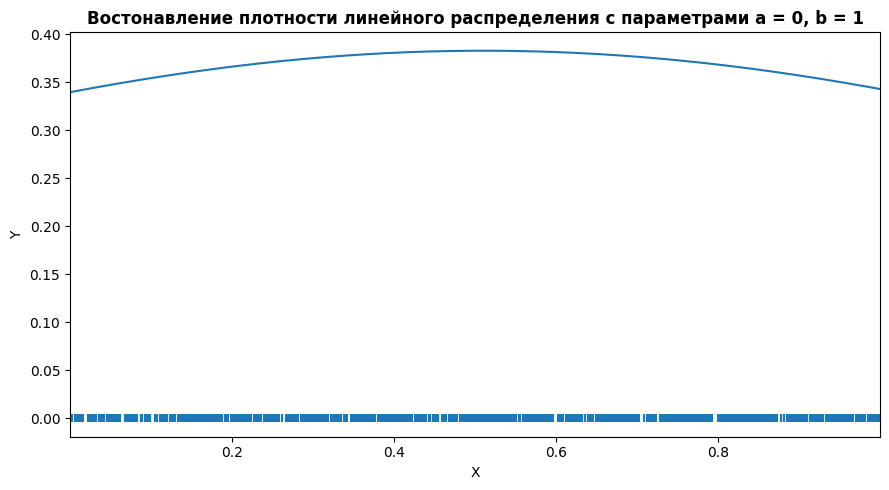

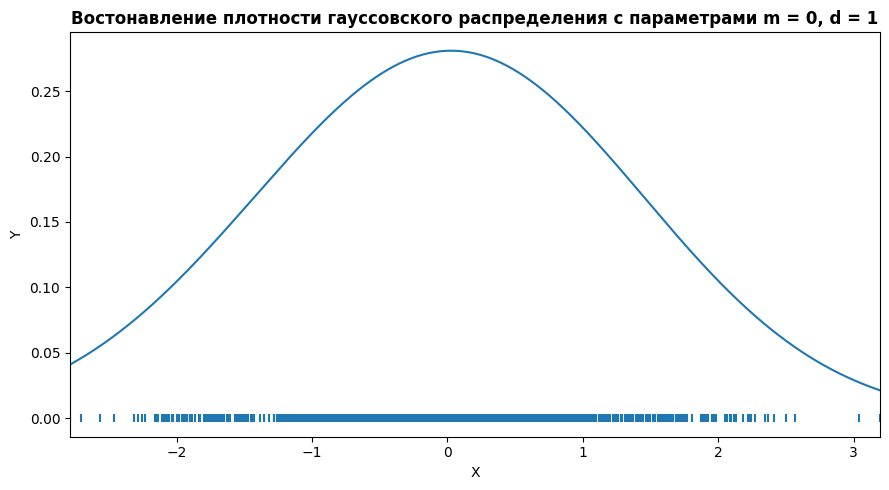

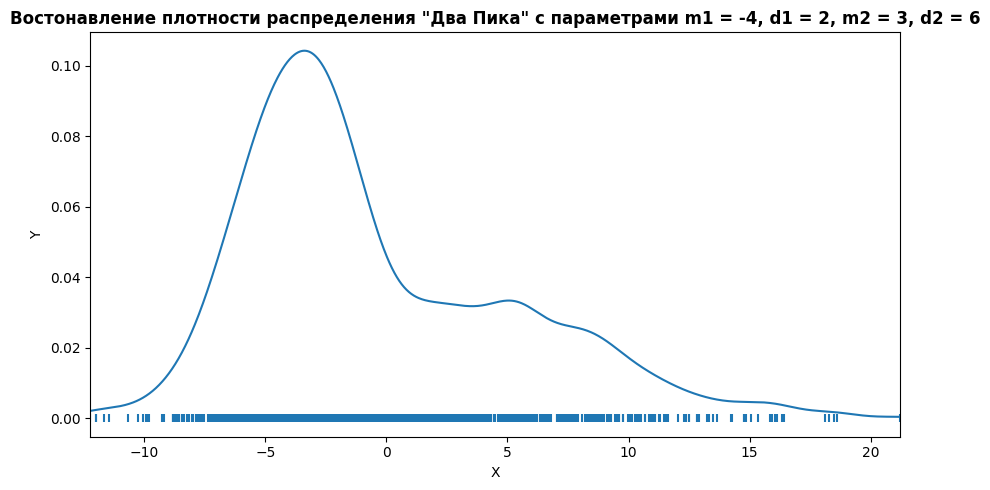

In [9]:
grid_points = 1000
# Изобразим график 1
lin_dat = LinearData(grid_points)
ld_min = min(lin_dat)
ld_max = max(lin_dat)
x = np.linspace(ld_min, ld_max, grid_points)

points = np.zeros((1000))

# Создадим график
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x, ParzRozen(x, lin_dat, h=1))
ax.scatter(lin_dat,points, marker = "|")

# Оформление
ax.set_xlim((ld_min, ld_max))
ax.set_title('Востонавление плотности линейного распределения с параметрами a = 0, b = 1', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

# Показ
plt.show()

# Изобразим график 2
gau_dat = GaussData(grid_points)
gau_min = min(gau_dat)
gau_max = max(gau_dat)
x = np.linspace(gau_min, gau_max, grid_points)

# Создадим график
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x, ParzRozen(x, gau_dat, h=1))
ax.scatter(gau_dat,points, marker = "|")


# Оформление
ax.set_xlim((gau_min, gau_max))
ax.set_title('Востонавление плотности гауссовского распределения с параметрами m = 0, d = 1', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

# Показ
plt.show()

# Изобразим график 3
tp_dat = TwoPeaksData(grid_points)
tp_min = min(tp_dat)
tp_max = max(tp_dat)
x = np.linspace(tp_min, tp_max, grid_points)

# Создадим график
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x, ParzRozen(x, tp_dat, h=1))
ax.scatter(tp_dat,points, marker = "|")

# Оформление
ax.set_xlim((tp_min, tp_max))
ax.set_title('Востонавление плотности распределения "Два Пика" с параметрами m1 = -4, d1 = 2, m2 = 3, d2 = 6', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

# Показ
plt.show()

### 4) Оптимизация ширины окна одного из наборов методом Leave One Out

$LOO(h) = -\sum_{i = 1}^{l}ln p_h(x_i; X^l/x_i) -> min_h$

In [10]:
#перебери циклом for наименьшее loo (от 0 до 10)
def LeaveOneOut(data,h):
    loo = 0
    for i in range(len(data)):
        loo = loo - math.log(ParzRozen(data[i],copy.copy(data[:i] + data[i+1:]),h=h))
    return loo

list = np.arange(0.5, 10.5, 0.5)
loo_min = 100000
h_min = 11
for h in list:
    if LeaveOneOut(tp_dat,h) < loo_min:
        loo_min = LeaveOneOut(lin_dat,h)
        h_min = h
print(f"LOO при стартовом значении h=10: {LeaveOneOut(tp_dat,h)}")

LOO при стартовом значении h=10: 3477.2888380484687


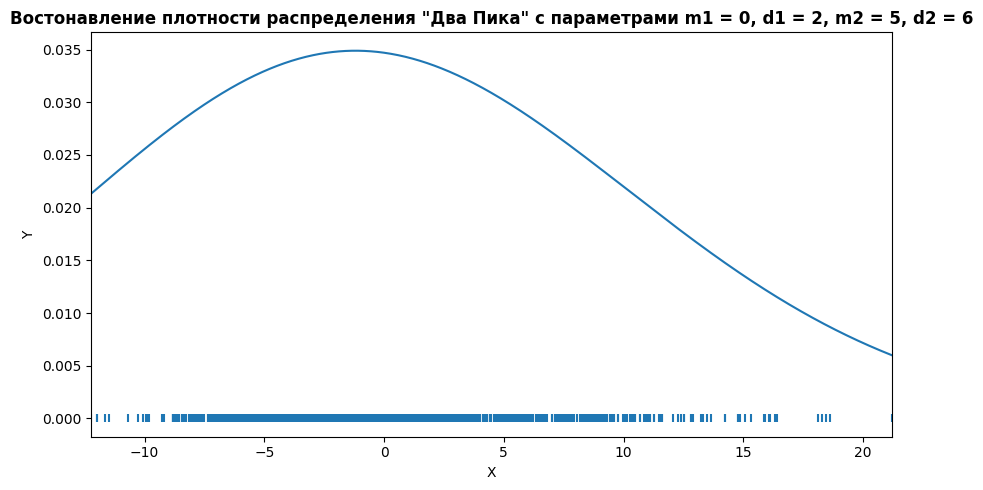

In [17]:
# Изобразим график 1
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x, ParzRozen(x, tp_dat, h=10))
points = np.zeros((1000))

ax.scatter(tp_dat,points, marker = "|")


# Оформление
ax.set_xlim((tp_min, tp_max))
ax.set_title('Востонавление плотности распределения "Два Пика" с параметрами m1 = 0, d1 = 2, m2 = 5, d2 = 6', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

# Показ
plt.show()

In [12]:
print(f"Оптимальный h по критерию LLO: {h_min}")
print(f"LOO при оптимальном значении: {loo_min}")

Оптимальный h по критерию LLO: 0.5
LOO при оптимальном значении: 500.10565869915416


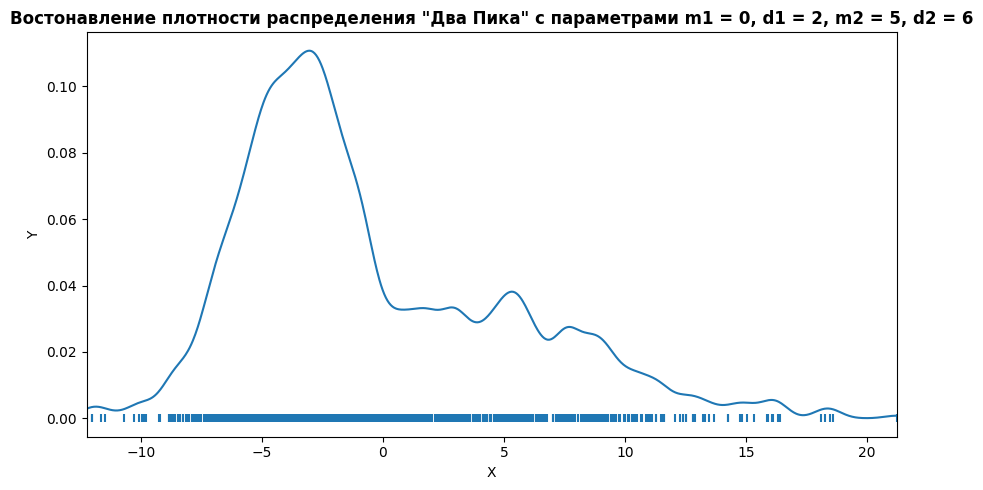

In [18]:
# Изобразим график 1
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x, ParzRozen(x, tp_dat, h=h_min))
points = np.zeros((1000))

ax.scatter(tp_dat,points, marker = "|")

# Оформление
ax.set_xlim((tp_min, tp_max))
ax.set_title('Востонавление плотности распределения "Два Пика" с параметрами m1 = 0, d1 = 2, m2 = 5, d2 = 6', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

# Показ
plt.show()

### 5) Два пика - алгоритм из SCIKIT-LEARN

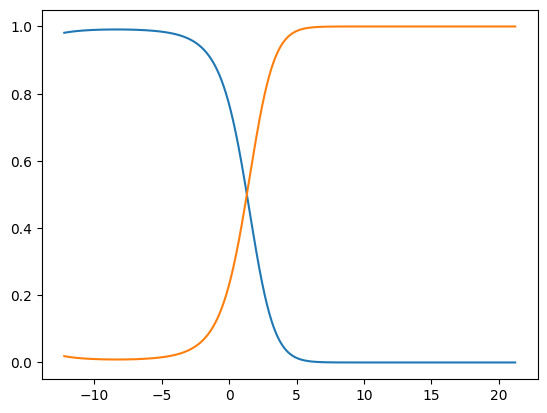

In [14]:
#Gaussian.mixture - пожалуй, самый ближайший к EM-Алгоритму
from sklearn.mixture import GaussianMixture
X = np.array(tp_dat).reshape(-1, 1)
gm = GaussianMixture(n_components=2, random_state=0).fit(X)
gm.means_
plt.plot(x, gm.predict_proba(np.array(x).reshape(-1, 1))[:,0],x, gm.predict_proba(np.array(x).reshape(-1, 1))[:,1])
plt.show()